In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import io
from google.colab import files 
uploaded = files.upload()

Saving weight-height.csv to weight-height.csv


In [7]:
df = pd.read_csv(io.BytesIO(uploaded['weight-height.csv']))
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [0]:
X=df[['Height']].values #input / Data
y_true=df[['Weight']].values # output / Answers

In [0]:
#line Euation
def line(x, w=0, b=0):
    return w*x+b

#Loss Function
def mean_squared_error(y_true, y_pred):
    s=(y_true-y_pred)**2
    return np.sqrt(s.mean())

Text(0.5, 0, 'b')

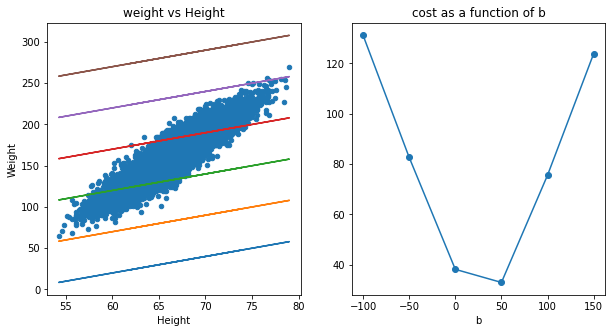

In [10]:
plt.figure(figsize = (10,5))
ax1 = plt.subplot(121)
df.plot(kind='scatter',
       x='Height',
       y='Weight',
       title='weight vs Height',
       ax=ax1)

bs = np.array([-100, -50, 0, 50, 100, 150])

mses =[]
for b in bs:
    y_pred = line(X, w=2, b=b)
    mse=mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X,y_pred)
    
ax2=plt.subplot(122)
plt.plot(bs, mses, 'o-')
 
plt.title('cost as a function of b')
plt.xlabel('b')

Text(0.5, 1.0, 'Cost Function of b')

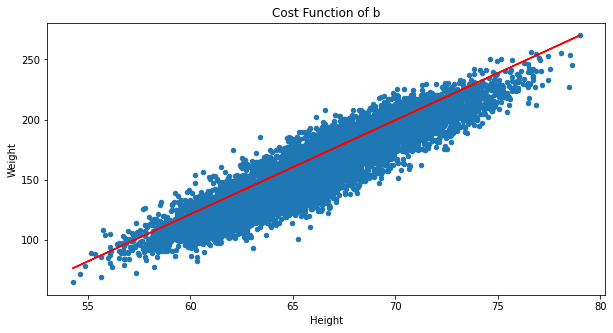

In [28]:
plt.figure(figsize = (10, 5))
ax1 = plt.subplot(111)
df.plot(kind = 'scatter',
       x = 'Height',
       y = 'Weight',
       title = 'Weight and Height in Adults', ax = ax1)

y_pred = line(X, w = 7.824774, b = -348.20322) # Adjust w and b for find
    

plt.plot(X, y_pred, color = 'red')
plt.title('Cost Function of b')

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
print(X[:2])
print(y_pred[:2])

[[73.84701702]
 [68.78190405]]
[[297.69403404]
 [287.56380809]]


In [13]:
X.shape

(10000, 1)

In [0]:
model = Sequential()

#model Structure
model.add(Dense(1, input_shape=(1,)))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(Adam(lr=0.8),"mean_squared_error")

In [19]:
model.fit(X,y_true, epochs=40)

Epoch 1/40
313/313 [==============================] - 0s 2ms/step - loss: 1049.8082
Epoch 2/40
313/313 [==============================] - 0s 1ms/step - loss: 570.4330
Epoch 3/40
313/313 [==============================] - 0s 2ms/step - loss: 525.3721
Epoch 4/40
313/313 [==============================] - 0s 2ms/step - loss: 505.4380
Epoch 5/40
313/313 [==============================] - 0s 2ms/step - loss: 434.3283
Epoch 6/40
313/313 [==============================] - 0s 1ms/step - loss: 410.9323
Epoch 7/40
313/313 [==============================] - 0s 2ms/step - loss: 360.8533
Epoch 8/40
313/313 [==============================] - 0s 2ms/step - loss: 353.5131
Epoch 9/40
313/313 [==============================] - 0s 2ms/step - loss: 307.8666
Epoch 10/40
313/313 [==============================] - 0s 2ms/step - loss: 267.9793
Epoch 11/40
313/313 [==============================] - 0s 2ms/step - loss: 251.4100
Epoch 12/40
313/313 [==============================] - 0s 2ms/step - loss: 233.3577


In [21]:
y_pred = model.predict(X)
y_pred

array([[229.63297],
       [189.99966],
       [231.69162],
       ...,
       [151.54938],
       [191.97409],
       [136.49649]], dtype=float32)

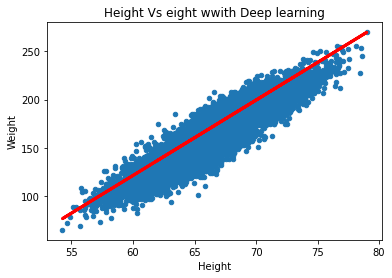

In [22]:
df.plot(kind="scatter",
       x='Height',
       y='Weight',
       title= 'Height Vs eight wwith Deep learning')
plt.plot(X,y_pred, color='red', linewidth = 3)

In [24]:
w,b=model.get_weights()
print(w, b, sep = "\n\n")

[[7.824774]]

[-348.20322]


In [25]:
model.predict([[200]])

array([[1216.7515]], dtype=float32)